In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import NLP_plots_models

from sklearn.utils import resample

from sklearn.utils import shuffle

import os

## Import de la base entendre la France 

avec informations sur chaque profil et tout le texte 'free' associé.

In [2]:
#Import de la base entendre la France avec informations sur chaque profil et tout le texte 'free' associé.
df_info_free=pd.read_csv('Donnees_clean/Entendre_La_France/info_free.csv')

On ne prend que les profils pour lesquels on a les sexes. 
Cette base de données:

- `features` = answer

- `target` = Sexe

Va nous servir de base de test pour l'apprentissage sur la base de données twitter.

In [3]:
print('Nombre de profils dont on connait le sexe: ', df_info_free.sexe.count())
print('Nombre de profils au total:', df_info_free.shape[0])
print('proportion: {prop:.2f}%'.format(prop=df_info_free.sexe.count()/df_info_free.shape[0] * 100))

Nombre de profils dont on connait le sexe:  8334
Nombre de profils au total: 10055
proportion: 82.88%


In [4]:
d={'answer' : df_info_free.answer, 'sexe' : df_info_free.sexe}
df_info_free_sexe=pd.DataFrame(data=d)

In [5]:
df_info_free_sexe.head()

,answer,sexe
0,C’est un point essentiel selon moi. Communique...,Homme
1,Le regard &&De l hautre &&De ce qu il fait Un ...,NaN
2,Dites leur la vérité. Si une situation est jug...,NaN
3,Rendre les actes ou paroles homophobe plus con...,NaN
4,Les conditions sont alarmique avec tout ces pe...,NaN


In [6]:
df_info_free_sexe=df_info_free_sexe.dropna(subset=['sexe']).reset_index(drop=True)

In [7]:
df_info_free_sexe.head()

,answer,sexe
0,C’est un point essentiel selon moi. Communique...,Homme
1,La revoir entièrement et supprimer la fraude f...,Femme
2,Il faut supprimer le senat mettre une assemble...,Homme
3,Réfléchir à un vrai programme d'Education à la...,Femme
4,Commencer par écouter ce qu'ils ont à dire ava...,Femme


## Import de la base des contributions:

In [8]:
df_author_contrib=pd.read_csv('Donnees_clean/contributions_auteur_unique/data_contrib_auteur_unique.csv')

In [9]:
df_author_contrib.head()

,authorId,texte
0,VXNlcjo0M2E0MTFiYy0yMWFlLTExZTktOTRkMi1mYTE2M2...,proposition écolo La biodiversité et la dispar...
1,VXNlcjo0M2E0ZWNkNy0xZDg1LTExZTktOTRkMi1mYTE2M2...,vivre à la campagne La pollution de l'air Plus...
2,VXNlcjo0M2E2MWRiNS0yMjNkLTExZTktOTRkMi1mYTE2M2...,Développement d'une conscience écologique indi...
3,VXNlcjo0M2E2ODg1MS0xZjBjLTExZTktOTRkMi1mYTE2M2...,maintenant pas demain ! trop de strates La bio...
4,VXNlcjo0M2E3MTc2Yi0xZjI4LTExZTktOTRkMi1mYTE2M2...,la belle verte! public La biodiversité et la d...


## Application des modèles NLP sur la base de données twitter pour le sexe:

In [8]:
df_profiles_tweets=pd.read_csv('Donnees_clean/twitter/tweets/tweets_elysee_2017_sexe.csv')
df_profiles_tweets.head()

,id_profile,tweets,sexe
0,100036070,Bisous Moi aussi :) bon après-midi bisous Ca n...,Homme
1,100042705,"C'est pas déjà fait avec ""En Marche"" ? Je comp...",Homme
2,1001415254,#directSH revirement plus que tardif des écolo...,Homme
3,1001470369,Mort à la cité par projets Ça m’angoisse un pe...,Homme
4,1001569926,.@vpecresse très claire sur la grève du #5déce...,Homme


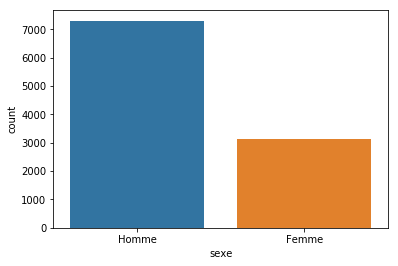

In [9]:
sns.countplot(df_profiles_tweets.sexe)

In [10]:
print('Nombre de comptes twitter considérés:', df_profiles_tweets.shape[0])

Nombre de comptes twitter considérés: 10416


In [11]:
print('toutes les targets de la base : ', df_profiles_tweets.sexe.unique())
Targets=['Homme', 'Femme']

toutes les targets de la base :  ['Homme' 'Femme']


#### Application sans se soucier du caractère non-équilibré du jeu de données

Preprocessing:

In [19]:
df_profiles_tweets['tweets'] = df_profiles_tweets['tweets'].astype('str').apply(NLP_plots_models.clean_tweets)

In [14]:
# Initializing TFIDF :
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
#Attributs :
features = tfidf.fit_transform(df_profiles_tweets.tweets).toarray()
#Labels :
labels = df_profiles_tweets.sexe

Pie Chart : 

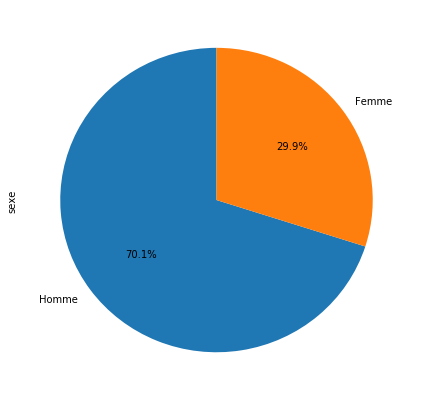

True

In [15]:
NLP_plots_models.partis_pie_chart(labels)

Correlation:

In [16]:
NLP_plots_models.correlations_uni_bi_grams(features, labels, tfidf)

For the party : 'Homme':
  . Most correlated unigrams:
. decue
. desolee
  . Most correlated bigrams:
. contente avoir
. ai envie
For the party : 'Femme':
  . Most correlated unigrams:
. decue
. desolee
  . Most correlated bigrams:
. contente avoir
. ai envie


True

Application des modèles:

------------- SGDClassifier ----------------------------------------


C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       Homme       0.71      1.00      0.83      2446
       Femme       0.00      0.00      0.00       992

    accuracy                           0.71      3438
   macro avg       0.36      0.50      0.42      3438
weighted avg       0.51      0.71      0.59      3438



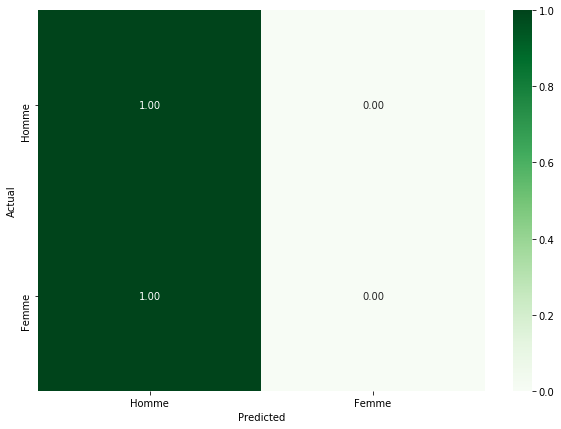

------------- RandomForestClassifier ----------------------------------------


C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       Homme       0.71      1.00      0.83      2446
       Femme       0.00      0.00      0.00       992

    accuracy                           0.71      3438
   macro avg       0.36      0.50      0.42      3438
weighted avg       0.51      0.71      0.59      3438



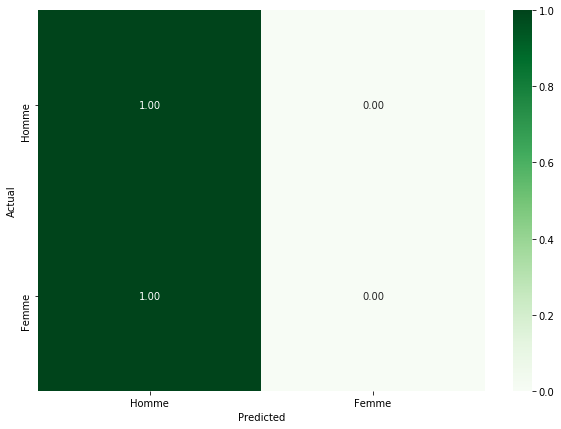

------------- LinearSVC ----------------------------------------
              precision    recall  f1-score   support

       Homme       0.78      0.92      0.85      2446
       Femme       0.66      0.37      0.48       992

    accuracy                           0.76      3438
   macro avg       0.72      0.65      0.66      3438
weighted avg       0.75      0.76      0.74      3438



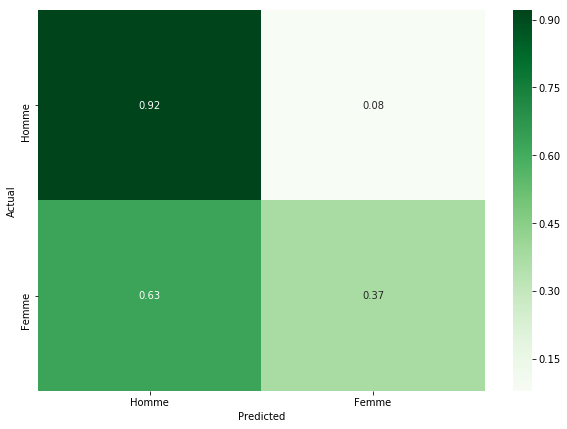

------------- MultinomialNB ----------------------------------------
              precision    recall  f1-score   support

       Homme       0.71      1.00      0.83      2446
       Femme       0.33      0.00      0.00       992

    accuracy                           0.71      3438
   macro avg       0.52      0.50      0.42      3438
weighted avg       0.60      0.71      0.59      3438



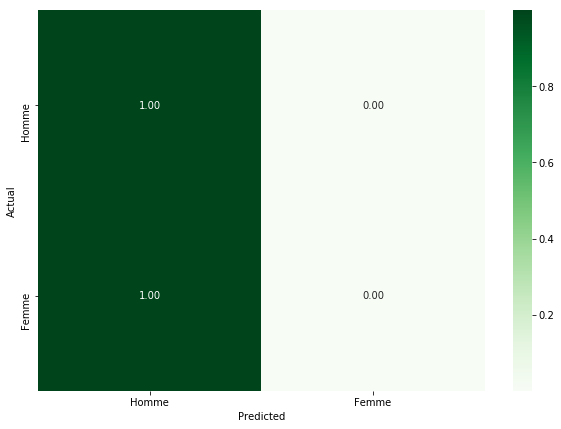

C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


------------- LogisticRegression ----------------------------------------
              precision    recall  f1-score   support

       Homme       0.74      0.99      0.85      2446
       Femme       0.83      0.14      0.24       992

    accuracy                           0.74      3438
   macro avg       0.78      0.56      0.54      3438
weighted avg       0.76      0.74      0.67      3438



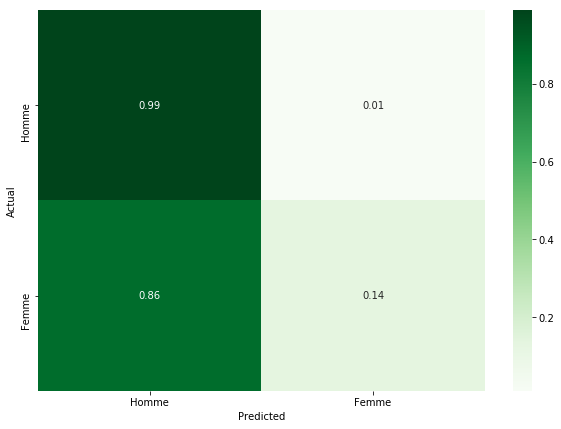

------------- DecisionTreeClassifier ----------------------------------------
              precision    recall  f1-score   support

       Homme       0.74      0.98      0.84      2446
       Femme       0.75      0.15      0.25       992

    accuracy                           0.74      3438
   macro avg       0.75      0.56      0.54      3438
weighted avg       0.74      0.74      0.67      3438



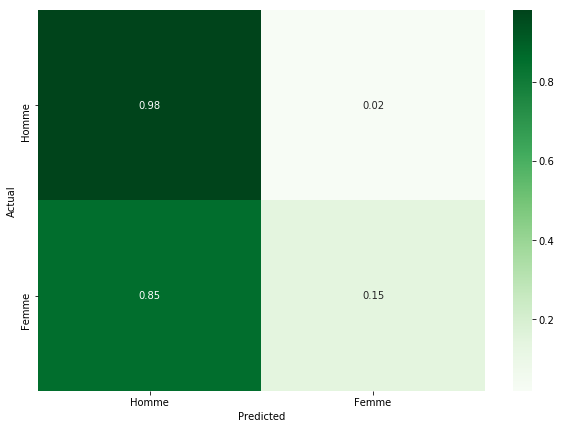

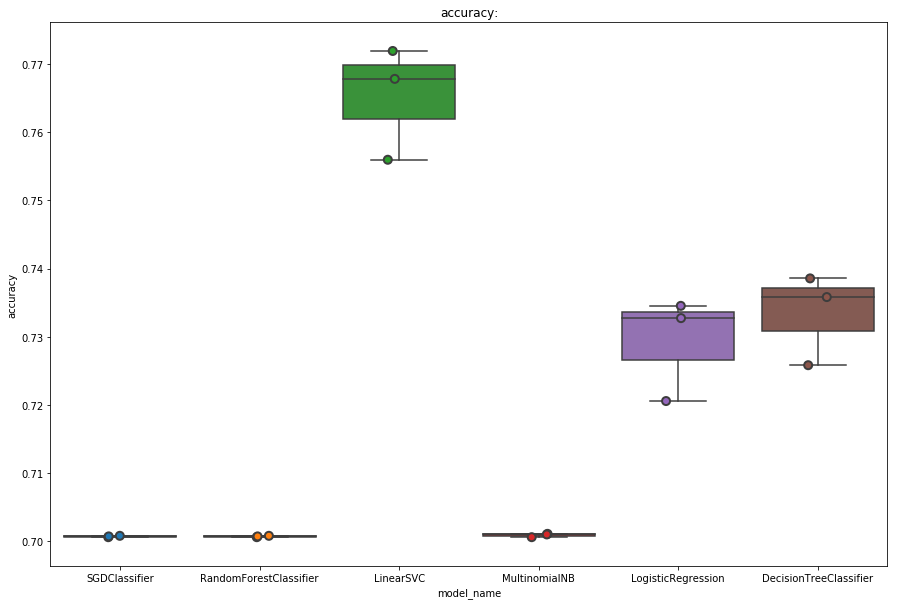

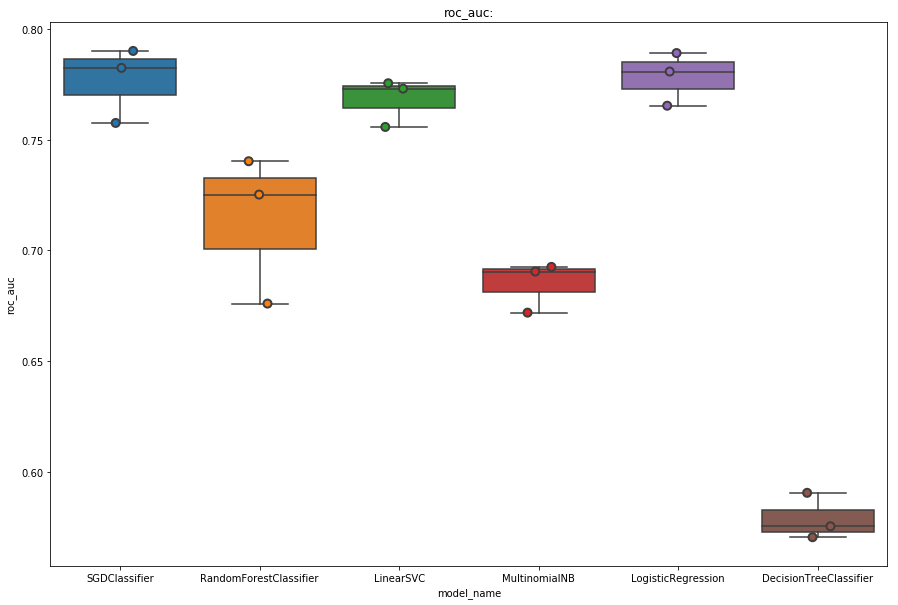

Accuracy:
model_name
DecisionTreeClassifier    0.733391
LinearSVC                 0.765263
LogisticRegression        0.729261
MultinomialNB             0.700845
RandomForestClassifier    0.700653
SGDClassifier             0.700653
Name: accuracy, dtype: float64
ROC AUC:
model_name
DecisionTreeClassifier    0.578946
LinearSVC                 0.768073
LogisticRegression        0.778374
MultinomialNB             0.685015
RandomForestClassifier    0.713844
SGDClassifier             0.776652
Name: roc_auc, dtype: float64


True

In [17]:
NLP_plots_models.models_test(features, labels, CV=3)

#### Problèmes liés au fait que les classes ne soient pas équilibrées: 
https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

OverSampling Minority Class:

In [20]:
# separate minority and majority classes
Femme = df_profiles_tweets[df_profiles_tweets.sexe=='Femme']
Homme = df_profiles_tweets[df_profiles_tweets.sexe=='Homme']

# upsample minority
femme_upsampled = resample(Femme,
                          replace=True, # sample with replacement
                          n_samples=len(Homme), # match number in majority class
                          random_state=27) # reproducible results


In [21]:
# combine majority and upsampled minority
upsampled_tweets = pd.concat([Homme, femme_upsampled])

**Le Dataset n'est pas shuffled!!!**

In [22]:
upsampled_tweets = shuffle(upsampled_tweets)

**Maintenant le dataset est shuffled**

In [23]:
upsampled_tweets.shape

(14596, 3)

In [24]:
print("Nombre d'hommes dans le set upsampled: ", upsampled_tweets[upsampled_tweets.sexe=='Homme'].shape[0])

Nombre d'hommes dans le set upsampled:  7298


In [25]:
print("Nombre de femmes dans le set upsampled: ", upsampled_tweets[upsampled_tweets.sexe=='Femme'].shape[0])

Nombre de femmes dans le set upsampled:  7298


On a maintenant un set intitulé `upsampled` contenant autant de femmes que d'hommes.

In [18]:
# Initializing TFIDF :
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
#Attributs :
features = tfidf.fit_transform(upsampled_tweets.tweets).toarray()
#Labels :
labels = upsampled_tweets.sexe

Vérification via Pie Chart :

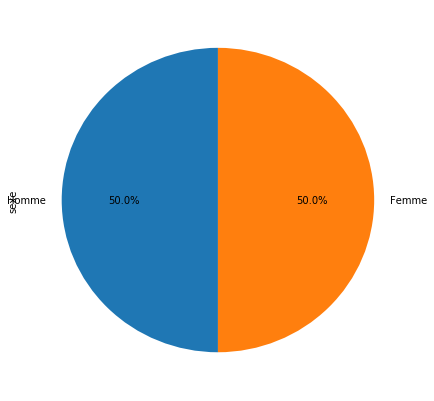

True

In [21]:
NLP_plots_models.partis_pie_chart(labels)

Nouvelle application des modèles: 

------------- SGDClassifier ----------------------------------------
              precision    recall  f1-score   support

       Homme       0.90      0.40      0.55      2476
       Femme       0.60      0.95      0.73      2341

    accuracy                           0.67      4817
   macro avg       0.75      0.67      0.64      4817
weighted avg       0.75      0.67      0.64      4817



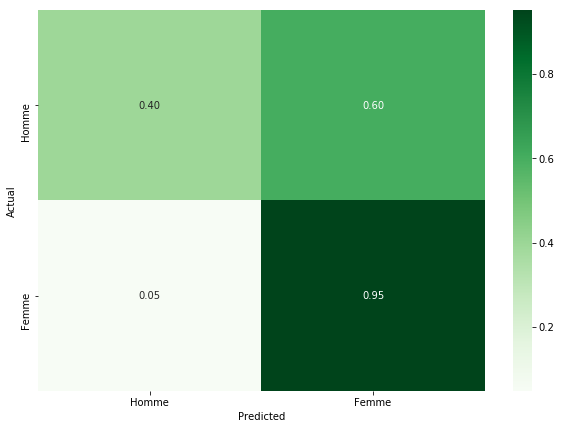

------------- RandomForestClassifier ----------------------------------------
              precision    recall  f1-score   support

       Homme       0.83      0.49      0.62      2476
       Femme       0.62      0.89      0.74      2341

    accuracy                           0.69      4817
   macro avg       0.73      0.69      0.68      4817
weighted avg       0.73      0.69      0.68      4817



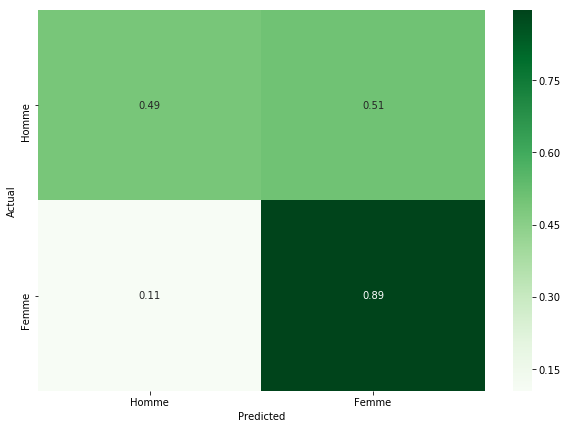

------------- LinearSVC ----------------------------------------
              precision    recall  f1-score   support

       Homme       0.90      0.86      0.88      2476
       Femme       0.86      0.90      0.88      2341

    accuracy                           0.88      4817
   macro avg       0.88      0.88      0.88      4817
weighted avg       0.88      0.88      0.88      4817



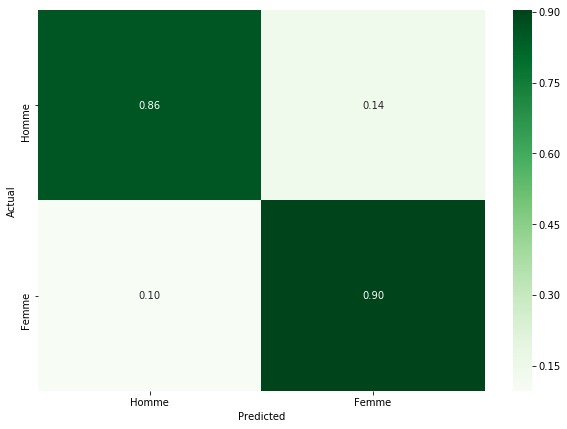

------------- MultinomialNB ----------------------------------------
              precision    recall  f1-score   support

       Homme       0.64      0.99      0.77      2476
       Femme       0.96      0.41      0.58      2341

    accuracy                           0.71      4817
   macro avg       0.80      0.70      0.67      4817
weighted avg       0.80      0.71      0.68      4817



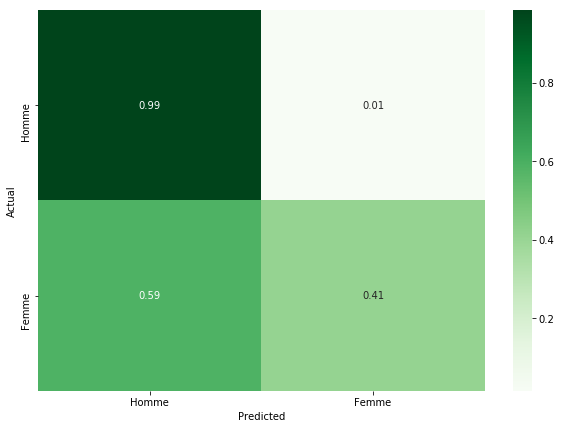

C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


------------- LogisticRegression ----------------------------------------
              precision    recall  f1-score   support

       Homme       0.86      0.83      0.85      2476
       Femme       0.83      0.86      0.84      2341

    accuracy                           0.85      4817
   macro avg       0.85      0.85      0.85      4817
weighted avg       0.85      0.85      0.85      4817



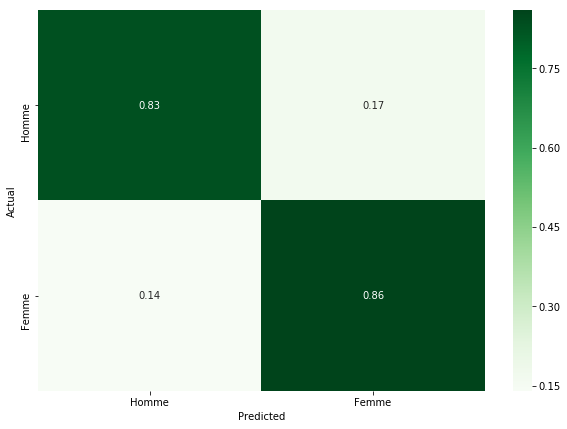

------------- DecisionTreeClassifier ----------------------------------------
              precision    recall  f1-score   support

       Homme       0.63      0.73      0.68      2476
       Femme       0.66      0.54      0.59      2341

    accuracy                           0.64      4817
   macro avg       0.64      0.64      0.63      4817
weighted avg       0.64      0.64      0.63      4817



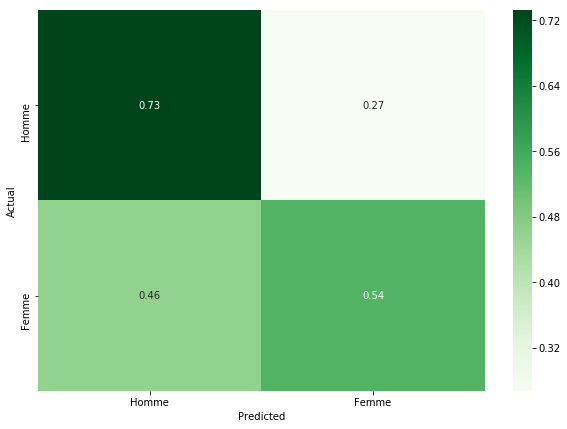

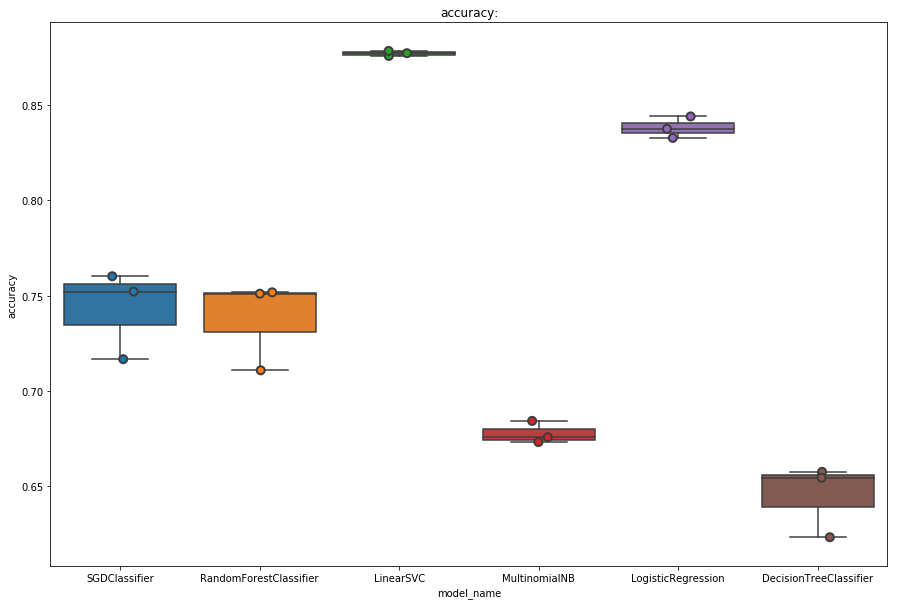

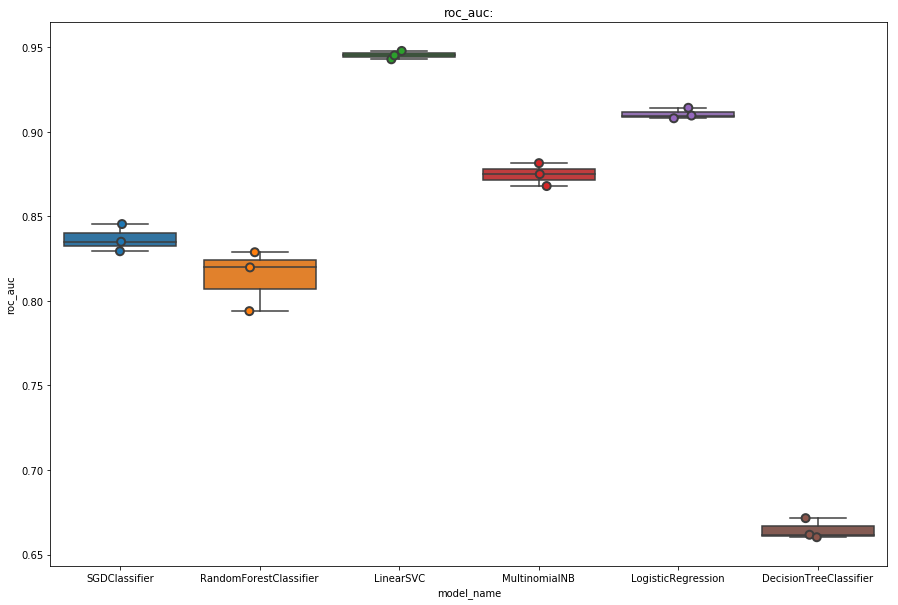

Accuracy:
model_name
DecisionTreeClassifier    0.645174
LinearSVC                 0.877021
LogisticRegression        0.838039
MultinomialNB             0.677788
RandomForestClassifier    0.737875
SGDClassifier             0.743008
Name: accuracy, dtype: float64
ROC AUC:
model_name
DecisionTreeClassifier    0.664482
LinearSVC                 0.945317
LogisticRegression        0.910624
MultinomialNB             0.874803
RandomForestClassifier    0.814192
SGDClassifier             0.836610
Name: roc_auc, dtype: float64


True

In [28]:
NLP_plots_models.models_test(features, labels, CV=3)

**Meilleur modèle:**

Les deux meilleurs modèles:
- LinearSVC (0.88 d'accuracy et 0.95 d'AUC-ROC)
- Régression Logistique (0.85 d'accuracy et 0.91 d'AUC-ROC)

On va donc essayer d'optimiser les paramètres sur ces deux algorithmes via GridSearch.

Puisque les modèles ont déjà un très bon score AUC-ROC, on va essayer d'améliorer l'accuracy.

**GridSearch :**

##### GridSearch sur LinearSVC: 

In [31]:
#Définition des paramètres de la GridSearch:
parameters = { 'C': [0.3,0.5,1,5,10]}


#'dual':[True, False],


#Initialisation de l'Algo:
algo = LinearSVC()
#Initialisation de la GridSearch grâce aux paramètres et à l'algorithme précédemment défini:
clf = GridSearchCV(estimator=algo, param_grid=parameters, cv=3)
#On fit sur le set:
clf.fit(features, labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None, param_grid={'C': [0.3, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Résultats de la classification:**

In [32]:
print(clf.best_params_)

{'C': 1}


In [33]:
print(clf.best_score_)

0.8791449712249931


In [34]:
clf.cv_results_

{'mean_fit_time': array([57.18566298, 57.82701969, 59.51351062, 59.34094191, 57.72314843]),
 'std_fit_time': array([5.10629187, 0.7401186 , 1.67411805, 1.94866607, 6.46915549]),
 'mean_score_time': array([11.26261981,  6.33641672, 21.24803424,  8.91815082, 10.89904642]),
 'std_score_time': array([1.80347171, 3.19313303, 8.02516807, 0.94884958, 0.54856849]),
 'param_C': masked_array(data=[0.3, 0.5, 1, 5, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.3}, {'C': 0.5}, {'C': 1}, {'C': 5}, {'C': 10}],
 'split0_test_score': array([0.87094122, 0.87402384, 0.87669544, 0.87648993, 0.87607891]),
 'split1_test_score': array([0.87217427, 0.87936704, 0.88039457, 0.87669544, 0.87505138]),
 'split2_test_score': array([0.86944901, 0.87849507, 0.88034539, 0.87931743, 0.87870066]),
 'mean_test_score': array([0.87085503, 0.87729515, 0.87914497, 0.87750069, 0.87661003]),
 'std_test_score': array([0.00111421, 0.00234063, 

**On affine les résultats:**

In [35]:
#Définition des paramètres de la GridSearch:
parameters = { 'C': [0.5,0.7,1,1.5,2]}


#'dual':[True, False],


#Initialisation de l'Algo:
algo = LinearSVC()
#Initialisation de la GridSearch grâce aux paramètres et à l'algorithme précédemment défini:
clf = GridSearchCV(estimator=algo, param_grid=parameters, cv=3)
#On fit sur le set:
clf.fit(features, labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None, param_grid={'C': [0.5, 0.7, 1, 1.5, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Affichage des résultats de la classification:**

In [36]:
print(clf.best_params_)

{'C': 1}


In [37]:
print(clf.best_score_)

0.8791449712249931


In [38]:
clf.cv_results_

{'mean_fit_time': array([65.02048047, 56.00394011, 62.27569564, 61.79254023, 62.62297988]),
 'std_fit_time': array([7.05722951, 9.92691671, 1.98939959, 1.93630586, 1.93732164]),
 'mean_score_time': array([13.02223738, 19.11853552,  9.01860992,  8.2339797 ,  8.78396598]),
 'std_score_time': array([ 4.4698687 , 11.53339636,  1.28914982,  2.38649958,  0.67187388]),
 'param_C': masked_array(data=[0.5, 0.7, 1, 1.5, 2],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.5}, {'C': 0.7}, {'C': 1}, {'C': 1.5}, {'C': 2}],
 'split0_test_score': array([0.87402384, 0.87669544, 0.87669544, 0.87607891, 0.87505138]),
 'split1_test_score': array([0.87936704, 0.8810111 , 0.88039457, 0.87895602, 0.87772298]),
 'split2_test_score': array([0.87849507, 0.87828947, 0.88034539, 0.8801398 , 0.87911184]),
 'mean_test_score': array([0.87729515, 0.87866539, 0.87914497, 0.87839134, 0.87729515]),
 'std_test_score': array([0.00234063, 0.001

**On essaie encore d'affiner:**

In [39]:
#Définition des paramètres de la GridSearch:
parameters = { 'C': [0.8,0.9,1,1.1,1.3]}

#Initialisation de l'Algo:
algo = LinearSVC()
#Initialisation de la GridSearch grâce aux paramètres et à l'algorithme précédemment défini:
clf = GridSearchCV(estimator=algo, param_grid=parameters, cv=3)
#On fit sur le set:
clf.fit(features, labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None, param_grid={'C': [0.8, 0.9, 1, 1.1, 1.3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Affichage des résultats de la classification:**

In [40]:
print(clf.best_params_)

{'C': 1.1}


In [41]:
print(clf.best_score_)

0.879624554672513


In [42]:
clf.cv_results_

{'mean_fit_time': array([65.80081201, 62.42525585, 61.746195  , 60.75519443, 59.06857411]),
 'std_fit_time': array([3.22901293, 0.44988533, 2.0275032 , 3.49409213, 4.32905483]),
 'mean_score_time': array([24.95320249,  9.4848237 ,  8.89858556, 15.12230444,  8.06826798]),
 'std_score_time': array([19.10375553,  0.8005203 ,  1.02933537, 10.61350209,  1.708232  ]),
 'param_C': masked_array(data=[0.8, 0.9, 1, 1.1, 1.3],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.8}, {'C': 0.9}, {'C': 1}, {'C': 1.1}, {'C': 1.3}],
 'split0_test_score': array([0.87731196, 0.87690095, 0.87669544, 0.87710645, 0.87710645]),
 'split1_test_score': array([0.88039457, 0.87998356, 0.88039457, 0.88060008, 0.87998356]),
 'split2_test_score': array([0.8801398 , 0.88034539, 0.88034539, 0.88116776, 0.88034539]),
 'mean_test_score': array([0.879282  , 0.87907646, 0.87914497, 0.87962455, 0.87914497]),
 'std_test_score': array([0.00139704, 0

**Nous n'avons pas d'augmentation significative des résultats de classification, on applique donc le modèle avec C=1.1 et on arrête de chercher via GridSearch de meilleurs paramètres.**

##### Avant optimisation:

In [28]:
#le = preprocessing.LabelEncoder()
#le.fit(labels)
#labels_encoded=le.transform(labels)

In [22]:
X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size=0.25, random_state=52)

In [30]:
#Initialisation de l'Algo:
clf = LinearSVC(C=1)
#On fit sur le set:
clf.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [31]:
#Accuracy:
print('Accuracy: {acc:.2f}%'.format(acc=clf.score(X_test, y_test)*100))

Accuracy: 89.72%


Il n'y a pas de `predict_proba` avec LinearSVC

In [32]:
#y_pred_auc=clf.predict_proba(X_test)
#AUC-ROC:
#print('AUC-ROC : {auc:.2f}'.format(auc=roc_auc_score(y_test, y_pred_auc)*100))

##### Après Optimisation:

In [33]:
#Initialisation de l'Algo:
clf = LinearSVC(C=1.1)
#On fit sur le set:
clf.fit(X_train, y_train)

LinearSVC(C=1.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [34]:
#Accuracy:
clf.score(X_test, y_test)

0.8977802137571937

Il n'y a pas de `predict_proba` avec LinearSVC

In [35]:
#y_pred_auc=clf.predict_proba(X_test)
#AUC-ROC:
#print('AUC-ROC : {auc:.2f}'.format(auc=roc_auc_score(y_test, y_pred_auc)*100))

On a donc aucun changement.

##### GridSearch sur la Régression Logistique:

In [36]:
#Définition des paramètres de la GridSearch:
parameters = {'dual':[True, False], 'C': [0.1,0.5,1,5]}
#Initialisation de l'Algo:
algo = LogisticRegression()
#Initialisation de la GridSearch grâce aux paramètres et à l'algorithme précédemment défini:
clf = GridSearchCV(estimator=algo, param_grid=parameters, cv=3)
#On fit sur le set:
clf.fit(features, labels)

MemoryError: Unable to allocate array with shape (9730, 198015) and data type float64

**Résultats de la classification:**

In [ ]:
print(clf.best_params_)

In [ ]:
print(clf.best_score_)

In [ ]:
clf.cv_results_

**On observe que résoudre le problème dual ou non ne change rien.** 

**Par contre, le paramètre de régularisation C a une grande influence sur le score.**

On essaie d'améliorer encore les paramètres: 
- Puisque le paramètre dual n'a quasiment pas d'influence, on ne le considère pas ici. 

- On essaie d'afiner un peu plus le paramètre de régularisation.

In [29]:
#Définition des paramètres de la GridSearch:
parameters = {'C': [3,5,7,10,15]}
#Initialisation de l'Algo:
algo = LogisticRegression()
#Initialisation de la GridSearch grâce aux paramètres et à l'algorithme précédemment défini:
clf = GridSearchCV(estimator=algo, param_grid=parameters, cv=3)
#On fit sur le set:
clf.fit(features, labels)

C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [3, 5, 7, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Affichage des résultats:**

In [33]:
print(clf.best_params_)

{'C': 15}


In [34]:
print(clf.best_score_)

0.8810633050150726


In [35]:
clf.cv_results_

{'mean_fit_time': array([115.14383205, 124.43507957, 118.12743886, 112.36717216,
        115.60959784]),
 'std_fit_time': array([12.28704201,  3.79559547,  0.94588125,  3.91044678,  2.73347007]),
 'mean_score_time': array([21.77736855, 37.38198344, 21.49414929, 24.12022781, 16.90751712]),
 'std_score_time': array([ 4.98748048, 14.45216129,  3.0268913 ,  4.90266111,  3.7316028 ]),
 'param_C': masked_array(data=[3, 5, 7, 10, 15],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 3}, {'C': 5}, {'C': 7}, {'C': 10}, {'C': 15}],
 'split0_test_score': array([0.86724209, 0.87792848, 0.87977805, 0.88039457, 0.88080559]),
 'split1_test_score': array([0.864776  , 0.87381833, 0.8756679 , 0.87648993, 0.87648993]),
 'split2_test_score': array([0.87479441, 0.88363487, 0.88671875, 0.88569079, 0.88589638]),
 'mean_test_score': array([0.86893669, 0.87845985, 0.88072075, 0.88085777, 0.88106331]),
 'std_test_score': array([0.00426

**On affine encore:** 

In [36]:
#Définition des paramètres de la GridSearch:
parameters = {'C': [15, 50, 100]}
#Initialisation de l'Algo:
algo = LogisticRegression()
#Initialisation de la GridSearch grâce aux paramètres et à l'algorithme précédemment défini:
clf = GridSearchCV(estimator=algo, param_grid=parameters, cv=3)
#On fit sur le set:
clf.fit(features, labels)

C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [15, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Affichage des résultats:**

In [37]:
print(clf.best_params_)

{'C': 15}


In [38]:
print(clf.best_score_)

0.8810633050150726


In [39]:
clf.cv_results_

{'mean_fit_time': array([134.67552336, 119.70703427, 119.00681686]),
 'std_fit_time': array([17.17712332,  4.17599773,  3.45851545]),
 'mean_score_time': array([23.13511523, 18.22679512, 18.8262651 ]),
 'std_score_time': array([5.8215344 , 2.58729955, 1.84354794]),
 'param_C': masked_array(data=[15, 50, 100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 15}, {'C': 50}, {'C': 100}],
 'split0_test_score': array([0.88080559, 0.88060008, 0.87998356]),
 'split1_test_score': array([0.87648993, 0.87464036, 0.87443485]),
 'split2_test_score': array([0.88589638, 0.88610197, 0.88589638]),
 'mean_test_score': array([0.88106331, 0.8804467 , 0.88010414]),
 'std_test_score': array([0.00384436, 0.00468028, 0.00467977]),
 'rank_test_score': array([1, 2, 3])}

##### Avant optimisation : 

In [37]:
#Initialisation de l'Algo:
clf = LogisticRegression()
#On fit sur le set:
clf.fit(X_train, y_train)

C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
#Accuracy:
print('Accuracy {acc:.2e}'.format(acc=clf.score(X_test, y_test)))

0.8487256782680186

In [39]:
y_pred_auc=clf.predict_proba(X_test)
#AUC-ROC:
print('AUC : {auc:.2e}'.format(roc_auc_score(y_test, y_pred_auc)))

ValueError: bad input shape (3649, 2)

##### Après Optimisation:

In [44]:
#Initialisation de l'Algo:
clf = LogisticRegression(C=15)
#On fit sur le set:
clf.fit(X_train, y_train)

C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=15, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Accuracy:
print('Accuracy {acc:.2e}'.format(acc=clf.score(X_test, y_test)))

In [ ]:
y_pred_auc=clf.predict_proba(X_test)
#AUC-ROC:
print('AUC : {auc:.2e}'.format(roc_auc_score(y_test, y_pred_auc)))

On a une augmentation des scores.

## Application des meilleurs modèles sur la base entendre la France:

Entrainement sur la base twitter, puis validation sur la base entendre la France.

Il faut réaliser la TF-IDF sur les deux bases en même temps, sinon on aura un problème évident de représentation de chaque texte.

##### Définition des deux bases de données

In [26]:
#Base d'entrainement (tweets #Elysée2017): 
upsampled_tweets.head()

,id_profile,tweets,sexe
10174,913139420,fin course enfantssanscancer gofightwin...,Femme
6044,452165027,epitaph bonjour j en sors juste s il sup ...,Femme
4564,327336984,olivier is back jour combat maladie footing...,Homme
6833,512268220,felicitations bonne chance nouvelle aventure ...,Femme
3022,255128617,l adhesion habitants nord lillois reforme retr...,Femme


In [27]:
#Base de test (Base Entendre La France)
df_info_free_sexe.head()

,answer,sexe
0,C’est un point essentiel selon moi. Communique...,Homme
1,La revoir entièrement et supprimer la fraude f...,Femme
2,Il faut supprimer le senat mettre une assemble...,Homme
3,Réfléchir à un vrai programme d'Education à la...,Femme
4,Commencer par écouter ce qu'ils ont à dire ava...,Femme


In [28]:
df_info_free_sexe['answer'] = df_info_free_sexe['answer'].astype('str').apply(NLP_plots_models.clean_tweets)

##### Sur-échantillonnage de la classe minoritaire:

In [29]:
# separate minority and majority classes
Femme = df_info_free_sexe[df_info_free_sexe.sexe=='Femme']
Homme = df_info_free_sexe[df_info_free_sexe.sexe=='Homme']

# upsample minority
femme_upsampled = resample(Femme,
                          replace=True, # sample with replacement
                          n_samples=len(Homme), # match number in majority class
                          random_state=27) # reproducible results


In [30]:
# combine majority and upsampled minority
upsampled_info_free_sexe = pd.concat([Homme, femme_upsampled])

**Le Dataset n'est pas shuffled!!!**

In [31]:
upsampled_info_free_sexe = shuffle(upsampled_info_free_sexe)

**Maintenant le dataset est shuffled**

In [32]:
upsampled_info_free_sexe.shape

(10032, 2)

In [33]:
print("Nombre d'hommes dans le set upsampled: ", upsampled_info_free_sexe[upsampled_info_free_sexe.sexe=='Homme'].shape[0])

Nombre d'hommes dans le set upsampled:  5016


In [34]:
print("Nombre de femmes dans le set upsampled: ", upsampled_info_free_sexe[upsampled_info_free_sexe.sexe=='Femme'].shape[0])

Nombre de femmes dans le set upsampled:  5016


On a maintenant un set intitulé `upsampled_info_free_sexe` contenant autant de femmes que d'hommes.

##### TF-IDF et préparation des données:

**Preprocessing (nettoyage):**

In [35]:
#Nettoyage de la base d'entrainement:
upsampled_tweets['tweets'] = upsampled_tweets['tweets'].astype('str').apply(NLP_plots_models.clean_tweets)

In [36]:
#Nettoyage de la base de test:
upsampled_info_free_sexe['answer'] = upsampled_info_free_sexe['answer'].astype('str').apply(NLP_plots_models.clean_tweets)

On met une colonne 'train' pour savoir si la ligne fait partie de l'entrainement ou du test (1 entrainement, 0 test) 

In [37]:
#upsampled est la base d'entrainement
upsampled_tweets['train']=1
#df_info_free_sexe est la base de test:
upsampled_info_free_sexe['train']=0

Concaténation des training et test sets pour pouvoir appliquer TF-IDF : 

In [38]:
# création des données : d'abord les contributions puis la base de données d'apprentissage
d={"texte" : pd.concat([upsampled_tweets.tweets, upsampled_info_free_sexe.answer], axis=0), 
   
   "sexe" : pd.concat([upsampled_tweets.sexe,upsampled_info_free_sexe.sexe], axis=0),
   
   "train" : pd.concat([upsampled_tweets.train, upsampled_info_free_sexe.train], axis=0) 
}
df_train_test=pd.DataFrame(data=d)

**TFIDF :**

In [39]:
# Initializing TFIDF :
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), dtype='float32')
#Attributs :
tfidf.fit(df_train_test.texte)

C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  UserWarning)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype='float32', encoding='latin-1', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=True, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

On définit les features et labels pour tout le set:

In [40]:
features = tfidf.transform(df_train_test.texte)

In [41]:
labels = df_train_test.sexe

In [49]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#le.fit(labels)
#labels=le.transform(labels)

In [64]:
#le.inverse_transform([0,1])

array(['Femme', 'Homme'], dtype=object)

#### Entrainement du modèle :

On divise entre training/test sets :

In [42]:
#Features:
features_train= features[:len(df_train_test[df_train_test.train==1]),:]
features_test= features[-len(df_train_test[df_train_test.train==0]):,:]
#Labels:
labels_train=labels[df_train_test.train==1]
labels_test=labels[df_train_test.train==0]

##### LinearSVC: 

Entrainement sur la base twitter:

In [43]:
#Initialisation de l'Algo:
clf = LinearSVC(C=1.1)
#On fit sur le set:
clf.fit(features_train, labels_train)

LinearSVC(C=1.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Evaluation sur la base Entendre la France:

In [44]:
print('accuracy: {acc:.2f}'.format(acc=clf.score(features_test, labels_test)))
#labels_test_pred_roc=clf.predict_proba(features_test)
#print('AUC-ROC: {auc:.2f}'.format(auc=roc_auc_score(labels_test, labels_test_pred_roc))

accuracy: 0.58


##### LogisticRegression:

Entrainement sur la base twitter:

In [47]:
#Initialisation de l'Algo:
clf = LogisticRegression(C=15)
#On fit sur le set:
clf.fit(features_train, labels_train)

C:\Users\adrie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=15, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluation sur la base Entendre la France:

In [51]:
print('accuracy: {acc:.2f}'.format(acc=clf.score(features_test, labels_test)))

accuracy: 0.59
